# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [102]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [103]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [104]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [105]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [106]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#!pip install hebrew_tokenizer

In [107]:
# Hebrew tokenizer import:

# unmark if you want to use:
#import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [108]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [109]:
df_train.head(8)
df_train.shape

story gender
0  כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...      m
1  לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...      m
2  מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...      f
3  כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...      m
4  ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...      f
5  לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...      f
6  אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...      m
7  השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...      f

(753, 2)

In [110]:
df_test.head(3)
df_test.shape

test_example_id                                              story
0                0  כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1                1  הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת "...
2                2  אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...

(323, 2)

### Your implementation:
Write your code solution in the following code-cells

###  Tokenization
Here i'm writting the tokenize method that will remove from the corcuse all the above:
* English letters
* Digits
* Punctuation
* Special characters

In [113]:
# initial tokenizetion
def initial_tokenize(text):
    # Remove some general characters like digits englisgh letters and ,
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\,', '', text)
    text = re.sub(r'[a-zA-Z]', '', text)
    return text

In [114]:
# initial_tokenize test
tokenize_test_text = 'Hello this is a טקסט לבדיקה  , !"#$%&\'()*+-./:;<=>?@^_`{|}~ 12386  465)'
cleaned_tokenize_test_text = initial_tokenize(tokenize_test_text)
print(cleaned_tokenize_test_text)

    טקסט לבדיקה   !"#$%&'()*+-./:;<=>?@^_`{|}~   )


In [115]:
#aplication of initial_tokenize on the real corpus.
df_train['story'] = df_train['story'].apply(initial_tokenize)
df_test['story'] = df_test['story'].apply(initial_tokenize)

In [116]:
# Here we are going to check what unique symbols we have in our text so that we will know exactly what to remove
unique_characters_train = set()

for story in df_train['story']:
    unique_characters_train.update(set(story))
    
print(len(unique_characters_train))

unique_characters_test = set()

for story in df_test['story']:
    unique_characters_test.update(set(story))
    
print(len(unique_characters_test))

64
66


In [117]:
# Let's see more specific characters what we will need to delete from out text
unique_characters_train
unique_characters_test

{'\t',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 "'",
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '?',
 '[',
 '\\',
 ']',
 '`',
 '~',
 'á',
 'ִ',
 'ֿ',
 'א',
 'ב',
 'ג',
 'ד',
 'ה',
 'ו',
 'ז',
 'ח',
 'ט',
 'י',
 'ך',
 'כ',
 'ל',
 'ם',
 'מ',
 'ן',
 'נ',
 'ס',
 'ע',
 'ף',
 'פ',
 'ץ',
 'צ',
 'ק',
 'ר',
 'ש',
 'ת',
 '׳',
 '״',
 '\u200f',
 '–',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '′'}

{'\t',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 "'",
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 ':',
 ';',
 '?',
 '[',
 '\\',
 ']',
 '^',
 '`',
 '\xa0',
 'ã',
 'ó',
 'ִ',
 'ֶ',
 'ַ',
 'ָ',
 'ֹ',
 'א',
 'ב',
 'ג',
 'ד',
 'ה',
 'ו',
 'ז',
 'ח',
 'ט',
 'י',
 'ך',
 'כ',
 'ל',
 'ם',
 'מ',
 'ן',
 'נ',
 'ס',
 'ע',
 'ף',
 'פ',
 'ץ',
 'צ',
 'ק',
 'ר',
 'ש',
 'ת',
 '׳',
 '״',
 '\u200f',
 '–',
 '’',
 '“',
 '…',
 '☹'}

In [118]:
# now we will remove the characters that we haven't removed yet,
# so the final result will be as clean as possible in Hebrew
# and because we cheked what charters are in the text we know what exactly we need to to be removed
def tokenize(text):
    # Remove English letters, digits, punctuation, periods, and special characters
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\,', '', text)
    text = re.sub(r'[a-zA-Z]', '', text)
    text = re.sub(r"[!\"#$%'\(\)*+\-./:;=?\[\\\]`~\áִֿ׳״\u200f–‘’“”…′'☹\xa0ó^ã'\t]", '', text)
    text = text.strip()
    #text = text.split()
    return text.lower()

In [119]:
#aplication of tokenize on the real corpus.
df_train['story'] = df_train['story'].apply(tokenize)
df_test['story'] = df_test['story'].apply(tokenize)

In [120]:
# tokenize test
tokenize_test_text = 'Hello this is a טקסט לבדיקה  , !"#$%&\'()*☹+-./:;<=>?@^_`{|}~ 12386  465)'
cleaned_tokenize_test_text = tokenize(tokenize_test_text)
print(cleaned_tokenize_test_text)

טקסט לבדיקה   &<>@_{|}


In [121]:
# another test of chracters in text
unique_characters_train = set()

for story in df_train['story']:
    unique_characters_train.update(set(story))
    
print(len(unique_characters_train))

unique_characters_test = set()

for story in df_test['story']:
    unique_characters_test.update(set(story))
    
print(len(unique_characters_test))

unique_characters_train
unique_characters_test

28
32


{' ',
 'א',
 'ב',
 'ג',
 'ד',
 'ה',
 'ו',
 'ז',
 'ח',
 'ט',
 'י',
 'ך',
 'כ',
 'ל',
 'ם',
 'מ',
 'ן',
 'נ',
 'ס',
 'ע',
 'ף',
 'פ',
 'ץ',
 'צ',
 'ק',
 'ר',
 'ש',
 'ת'}

{' ',
 'ֶ',
 'ַ',
 'ָ',
 'ֹ',
 'א',
 'ב',
 'ג',
 'ד',
 'ה',
 'ו',
 'ז',
 'ח',
 'ט',
 'י',
 'ך',
 'כ',
 'ל',
 'ם',
 'מ',
 'ן',
 'נ',
 'ס',
 'ע',
 'ף',
 'פ',
 'ץ',
 'צ',
 'ק',
 'ר',
 'ש',
 'ת'}

In [122]:
# lets see how some of the corpus looks like now after the tokenization.
df_train.head(8)
df_train.shape

df_test.head(8)
df_test.shape

story gender
0  כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...      m
1  לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...      m
2  מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...      f
3  כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...      m
4  הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...      f
5  לפני כ חודשים טסתי לרומא למשך שבוע טסתי במטוס ...      f
6  אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...      m
7  השנה התחלנו שיפוץ בדירה שלנו בתל אביב הדירה הי...      f

(753, 2)

test_example_id                                              story
0                0  כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1                1  הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת י...
2                2  אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3                3  רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי אני ...
4                4  אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...
5                5  בפעם האחרונה שהייתי מחוץ לארץ ישראל הייתי באפר...
6                6  בשנת  קיבלתי החלטה שאני מתחיל ללמוד לתואר ראשו...
7                7  בנובמבר האחרון הייתי עם חברים בטיול ים אל ים ה...

(323, 2)

<BarContainer object of 2 artists>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

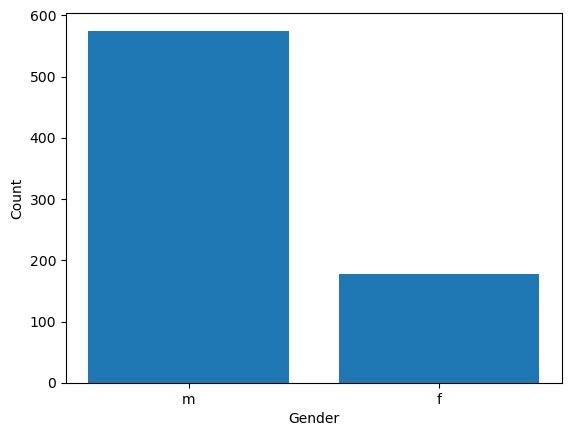

In [123]:
# Here we will check how many Famale and male stories we have in the corpus.
gender_counts = df_train['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

most of the train df is classified as male so it will be probably easier for the model to classify correctly stories that were written by males.

### Vectorization
The aplication of a data countVectorizer function over the corpus. <br/>
for this we will transfom the gender column values to be f = 1, m = 0. <br/>
and with the CountVectorizer we wil count how many times every word apears in each story.

In [129]:
# gender values transformation
def transform_gender(data):
    gender_mapping = {'m': 0, 'f': 1}
    transformed_data = data.copy()
    
    if 'gender' in transformed_data.columns:
        transformed_data['gender'] = transformed_data['gender'].map(gender_mapping)
    
    return transformed_data

In [130]:
# gender values transformation test :)
df_train = transform_gender(df_train)
df_train.head(8)

story  gender
0  כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...       0
1  לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...       0
2  מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...       1
3  כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...       0
4  הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...       1
5  לפני כ חודשים טסתי לרומא למשך שבוע טסתי במטוס ...       1
6  אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...       0
7  השנה התחלנו שיפוץ בדירה שלנו בתל אביב הדירה הי...       1

In [131]:
#type of values Check
print(df_train['story'].dtype)
print(df_train['gender'].dtype)

object
int64


In [132]:
# split every story to a collection of words to make the modeling easier.
def get_tokens(text):
    text = text.split()
    return text

In [133]:
df_train['story'] = df_train['story'].apply(get_tokens)
df_test['story'] = df_test['story'].apply(get_tokens)

In [134]:
df_test.head(8)
df_train.head(8)

test_example_id                                              story
0                0  [כל, קיץ, אני, והמשפחה, נוסעים, לארצות, הברית,...
1                1  [הגעתי, לשירות, המדינה, אחרי, שנתיים, כפעיל, ב...
2                2  [אחת, האהבות, הגדולות, שלי, אלו, הכלבים, שלי, ...
3                3  [רגע, הגיוס, לצבא, היה, הרגע, הכי, משמעותי, עב...
4                4  [אני, הגעתי, לברזיל, ישר, מקולומביה, וגם, אני,...
5                5  [בפעם, האחרונה, שהייתי, מחוץ, לארץ, ישראל, היי...
6                6  [בשנת, קיבלתי, החלטה, שאני, מתחיל, ללמוד, לתוא...
7                7  [בנובמבר, האחרון, הייתי, עם, חברים, בטיול, ים,...

story  gender
0  [כשחבר, הזמין, אותי, לחול, לא, באמת, חשבתי, שז...       0
1  [לפני, שהתגייסתי, לצבא, עשיתי, כל, מני, מיונים...       0
2  [מאז, שהתחילו, הלימודים, חלומו, של, כל, סטודנט...       1
3  [כשהייתי, ילד, מטוסים, היה, הדבר, שהכי, ריתק, ...       0
4  [הייתי, מדריכה, בכפר, נוער, ומתאם, הכפר, היינו...       1
5  [לפני, כ, חודשים, טסתי, לרומא, למשך, שבוע, טסת...       1
6  [אני, כבר, שנתיים, נשוי, והשנה, אני, ואישתי, ס...       0
7  [השנה, התחלנו, שיפוץ, בדירה, שלנו, בתל, אביב, ...       1

In [135]:
# Lets see how many unique words we have in our train stories.
# We have less test stories, and it most likely that the test stories will have some worlds that the train stories wont have.
# It may affect on the prediction acurrasy. 
unique_words_train = set()

for story in df_train['story']:
    unique_words_train.update(set(story))
    
print(len(unique_words_train))

unique_words_test = set()

for story in df_test['story']:
    unique_words_test.update(set(story))
    
print(len(unique_words_test))

shared_words = unique_words_train.intersection(unique_words_test)
different_words = unique_words_train.symmetric_difference(unique_words_test)

print("Number of shared words:", len(shared_words))
print("Number of different words:", len(different_words))

34957
21275
Number of shared words: 13484
Number of different words: 29264


we see that most of the words in the train set and test set are different and we will see how it will affect our text analysis results.


In [136]:
def vectorizer(df_train, df_test):
    vect = TfidfVectorizer(tokenizer=lambda x: x.split(), ngram_range=(1, 2),sublinear_tf = True,use_idf = False , min_df=4)
    
    df = pd.concat([df_train, df_test], axis=0)
    
    X = vect.fit_transform(df['story'].apply(lambda x: ' '.join(x)).to_list())
    y = df_train[df_train.columns[1]]  # Assuming 'gender' is in the second column
    
    df_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
    display(df_transformed)
    
    return X[:len(df_train)], X[len(df_train):], y

In [137]:
X_train, X_test, y_train = vectorizer(df_train, df_test)

א  א של  אאוט   אבא  אבא של  אבא שלה  אבא שלו  אבא שלי  אבוא  אבוד  \
0    0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   
1    0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   
2    0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   
3    0.000 0.000 0.000 0.113   0.000    0.000    0.000    0.113 0.000 0.000   
4    0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   
...    ...   ...   ...   ...     ...      ...      ...      ...   ...   ...   
1071 0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.050   
1072 0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   
1073 0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   
1074 0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   
1075 0.000 0.000 0.000 0.000   0.000    0.000    0.000    0.000 0.000 0.000   

      אבטלה   אבי  אביא  אביב  אביב היה  אביב זה  אביב כדי  אביב מה  אביב עם  \
0     0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
1     0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
2     0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
3     0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
4     0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
...     ...   ...   ...   ...       ...      ...       ...      ...      ...   
1071  0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
1072  0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
1073  0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
1074  0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   
1075  0.000 0.000 0.000 0.000     0.000    0.000     0.000    0.000    0.000   

      אביה   אבל  אבל אז  אבל אחרי  אבל אין  אבל אמרתי  אבל אנחנו  אבל אני  \
0    0.000 0.101   0.000     0.000    0.000      0.000      0.000    0.000   
1    0.000 0.047   0.000     0.000    0.000      0.000      0.000    0.047   
2    0.000 0.128   0.000     0.083    0.000      0.000      0.000    0.049   
3    0.000 0.073   0.000     0.000    0.000      0.000      0.000    0.000   
4    0.000 0.085   0.000     0.000    0.000      0.000      0.000    0.000   
...    ...   ...     ...       ...      ...        ...        ...      ...   
1071 0.000 0.084   0.000     0.000    0.050      0.000      0.000    0.000   
1072 0.000 0.057   0.000     0.000    0.000      0.000      0.000    0.000   
1073 0.000 0.000   0.000     0.000    0.000      0.000      0.000    0.000   
1074 0.000 0.047   0.000     0.000    0.000      0.000      0.000    0.000   
1075 0.000 0.044   0.000     0.000    0.000      0.000      0.000    0.000   

      אבל אף  אבל אפילו  אבל את  אבל בגלל  אבל בהחלט  אבל בכל  אבל בסוף  \
0      0.000      0.000   0.000     0.000      0.000    0.000     0.000   
1      0.000      0.000   0.000     0.000      0.000    0.000     0.000   
2      0.000      0.000   0.000     0.000      0.000    0.000     0.000   
3      0.000      0.000   0.000     0.000      0.000    0.000     0.000   
4      0.000      0.000   0.000     0.000      0.050    0.000     0.000   
...      ...        ...     ...       ...        ...      ...       ...   
1071   0.000      0.000   0.000     0.000      0.000    0.000     0.000   
1072   0.000      0.000   0.000     0.000      0.000    0.000     0.000   
1073   0.000      0.000   0.000     0.000      0.000    0.000     0.000   
1074   0.000      0.000   0.000     0.000      0.000    0.000     0.000   
1075   0.000      0.000   0.000     0.000      0.000    0.000     0.000   

      אבל בסופו  אבל ברגע  אבל גם  אבל די  אבל האמת  אבל הוא  אבל החלטנו  \
0         0.000     0.000   0.000   0.000     0.000    0.000       0.000   
1         0.000     0.000   0.000   0.000     0.000    0.000       0.000   
2         0.000     0.000   0.000

###  Cross validation and classification
Here I'm gonna do the classification.<br/>
Choose the model that will probably give me the most accurate results.<br/>
And I'm gonna classify the stories in the test df by gender.

In [139]:
# cross validation to try and understad what model wil give us the best results.
models = [
    ("LinearSVC", LinearSVC(), {'model__C': [0.1, 1, 10]}),
    ("MLPClassifier", MLPClassifier(), {'model__hidden_layer_sizes': [(100,), (50, 50)], 'model__alpha': [0.0001, 0.001]}),
    ("Perceptron", Perceptron(), {'model__alpha': [0.0001, 0.001, 0.01]}),
    ("SGDClassifier", SGDClassifier(), {'model__alpha': [0.0001, 0.001, 0.01]}),
    ("KMeans", KMeans(), {'model__n_clusters': [2, 3, 4]}),
    ("MultinomialNB", MultinomialNB(), {}),
    ("GaussianNB", GaussianNB(), {}),
    ("KNeighborsClassifier", KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7]}),
    ("DecisionTreeClassifier", DecisionTreeClassifier(), {'model__max_depth': [None, 5, 10]})
]

# Calculate average F1 scores for each model
for name, model, param_grid in models:
    X_train_dense = X_train.toarray()  # Convert sparse matrix to dense numpy array
    pipeline_model = Pipeline([('scaler', MaxAbsScaler()), ('model', model)])

    grid_search = GridSearchCV(pipeline_model, param_grid=param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train_dense, y_train)

    best_f1_score = grid_search.best_score_

    # Calculate average F1 score using cross-validation
    avg_f1_score = np.mean(cross_val_score(pipeline_model, X_train_dense, y_train, cv=5, scoring='f1_macro'))

    print(f"Model: {name}")
    print(f"Best F1 score: {best_f1_score}")
    print(f"Average F1 score: {avg_f1_score}\n")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.1, 1, 10]}, scoring='f1_macro')

Model: LinearSVC
Best F1 score: 0.6129410255745283
Average F1 score: 0.6129410255745283



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', MLPClassifier())]),
             param_grid={'model__alpha': [0.0001, 0.001],
                         'model__hidden_layer_sizes': [(100,), (50, 50)]},
             scoring='f1_macro')

Model: MLPClassifier
Best F1 score: 0.5183556358564567
Average F1 score: 0.500578198845159



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', Perceptron())]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01]},
             scoring='f1_macro')

Model: Perceptron
Best F1 score: 0.6405441610932339
Average F1 score: 0.6405441610932339



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', SGDClassifier())]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01]},
             scoring='f1_macro')

Model: SGDClassifier
Best F1 score: 0.6004281403917748
Average F1 score: 0.6380893465274469



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', KMeans())]),
             param_grid={'model__n_clusters': [2, 3, 4]}, scoring='f1_macro')

Model: KMeans
Best F1 score: 0.3954799718841727
Average F1 score: 0.0305339646984032



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', MultinomialNB())]),
             param_grid={}, scoring='f1_macro')

Model: MultinomialNB
Best F1 score: 0.6837279736158731
Average F1 score: 0.6837279736158731



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', GaussianNB())]),
             param_grid={}, scoring='f1_macro')

Model: GaussianNB
Best F1 score: 0.46050718187622974
Average F1 score: 0.46050718187622974



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 5, 7]}, scoring='f1_macro')

Model: KNeighborsClassifier
Best F1 score: 0.4873964490952801
Average F1 score: 0.4321261558699493



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [None, 5, 10]},
             scoring='f1_macro')

Model: DecisionTreeClassifier
Best F1 score: 0.5842242472536385
Average F1 score: 0.602878576619043



MultinomialNB model gave us the best Average F1 score of 0.6837279736158731 </br>
We will use it to classify the genders of the stories in the test model.

In [152]:
# Refit the best model
best_model = MultinomialNB()
best_model.fit(X_train_dense, y_train)

# Calculate average F1 score of refited MultinomialNB model using cross-validation
avg_f1_score = np.mean(cross_val_score(best_model, X_train_dense, y_train, cv=5, scoring='f1_macro'))

print(f"Average F1 score for the new MultinomialNB fit: {avg_f1_score}")

# Make predictions
predictions = best_model.predict(X_train_dense)

# Print the first 5 predictions
print("First 5 predictions:")
for i in range(5):
    print(predictions[i])

# Print the last 5 predictions
print("\nLast 5 predictions:")
for i in range(-5, 0, 1):
    print(predictions[i])

MultinomialNB()

Average F1 score for the new MultinomialNB fit: 0.43298340190097884
First 5 predictions:
0
0
0
0
0

Last 5 predictions:
0
0
0
0
0


The refited MultinomialNB model gave us worse Average f1 score.
this model dose not have parameters so i can't try to tune the modell to do a better fit. 
Lest try another model that gave us an average f1 of at least 0.6.
I chose LinearSVC that gave us average F1 score of 0.6129410255745283.

In [154]:
# Refit the LinearSVC model
best_model = LinearSVC(C=1.0)  # You can adjust the C parameter based on your GridSearch results.
best_model.fit(X_train_dense, y_train)

avg_f1_score = np.mean(cross_val_score(best_model, X_train_dense, y_train, cv=5, scoring='f1_macro'))

print(f"Average F1 score for the new LinearSVC fit: {avg_f1_score}")

# Make predictions
predictions = best_model.predict(X_train_dense)

# Print the first 5 predictions
print("First 5 predictions:")
for i in range(5):
    print(predictions[i])

# Print the last 5 predictions
print("\nLast 5 predictions:")
for i in range(-5, 0, 1):
    print(predictions[i])

LinearSVC()

Average F1 score for the new LinearSVC fit: 0.5791633339036542
First 5 predictions:
0
0
1
0
1

Last 5 predictions:
0
0
0
1
0


The Average F1 of the LinearSVC refitted model is 0.57 it is better than the 0.4 refit of the MultinomialNB model
but still not 0.6.
I will try Parameter Tuning to make it better.

In [155]:
# Lest try to find what patameters will give us the best result
pipeline_model = Pipeline([('scaler', MaxAbsScaler()), ('model', LinearSVC())])

param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__loss': ['hinge', 'squared_hinge'],
    'model__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(pipeline_model, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_dense, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MaxAbsScaler()),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10],
                         'model__loss': ['hinge', 'squared_hinge'],
                         'model__penalty': ['l1', 'l2']},
             scoring='f1_macro')

Best parameters:  {'model__C': 1, 'model__loss': 'hinge', 'model__penalty': 'l2'}
Best F1 score:  0.6130615458423838


In [157]:
# Fit the LinearSVC model with the best parameters
best_model = LinearSVC(C=1, loss='hinge', penalty='l2')
best_model.fit(X_train_dense, y_train)

avg_f1_score = np.mean(cross_val_score(best_model, X_train_dense, y_train, cv=5, scoring='f1_macro'))

print(f"Average F1 score for the new LinearSVC fit: {avg_f1_score}")

# Make predictions
predictions = best_model.predict(X_train_dense)

# Print the first 5 predictions
print("First 5 predictions:")
for i in range(5):
    print(predictions[i])

# Print the last 5 predictions
print("\nLast 5 predictions:")
for i in range(-5, 0, 1):
    print(predictions[i])

LinearSVC(C=1, loss='hinge')

Average F1 score for the new LinearSVC fit: 0.43255497233650164
First 5 predictions:
0
0
1
0
1

Last 5 predictions:
0
0
0
0
0


Didn't work and gave me even worse result.
I will change the parameter to what i think will be better.

In [159]:
# Fit the LinearSVC model with my parameters
best_model = LinearSVC(C=10, loss='squared_hinge', penalty='l2')
best_model.fit(X_train_dense, y_train)

avg_f1_score = np.mean(cross_val_score(best_model, X_train_dense, y_train, cv=5, scoring='f1_macro'))

print(f"Average F1 score for the new LinearSVC fit: {avg_f1_score}")

# Make predictions
predictions = best_model.predict(X_train_dense)

# Print the first 5 predictions
print("First 5 predictions:")
for i in range(5):
    print(predictions[i])

# Print the last 5 predictions
print("\nLast 5 predictions:")
for i in range(-5, 0, 1):
    print(predictions[i])

LinearSVC(C=10)

Average F1 score for the new LinearSVC fit: 0.6732107958180833
First 5 predictions:
0
0
1
0
1

Last 5 predictions:
0
0
0
1
0


The best Average F1 score for the new LinearSVC fit: 0.6732107958180833 :)</br>

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)